In [29]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from rnn_models import *
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import load_model
from data_preparation import StockIndexDataset
from utils import plot_seqs, create_labels

In [ ]:
print(tf.__version__)

In [31]:
# Set constant variables and hyperparameters for the model training

INPUT_PATH = r"C:\Users\Asus\OneDrive - MSU-Iligan Institute of Technology\Documents\GitHub\stock-market-prediction-RNN\old_data" 

RNN_params = {"batch_size": 32,
              "epochs": 120,
              "learning_rate": 1e-4,
              "time_steps": 12,
              "forecast_steps": 6,
              "window": 12,
              "RNN_size": 128,
              "FC_size": 32,
              "optim": Adam,
              "dropout": 0.5,
              "earlystop": {"patience": 20, 
                            "min_delta": 0.00001},
              "reduce_lr": {"factor": 0.1,
                            "patience": 10,
                            "min_delta": 0.0001}
              }

GRU_params = {"batch_size": 32,
              "epochs": 120,
              "lr": 1e-4,
              "time_steps": 6,
              "forecast_steps": 6,
              "window": 12,
              "RNN_size": 128,
              "FC_size": 32,
              "optim": Adam,
              "dropout": 0.5,
              "earlystop": {"patience": 20, 
                            "min_delta": 0.00001},
              "reduce_lr": {"factor": 0.1,
                            "patience": 10,
                            "min_delta": 0.0001}
              }

LSTM_params = {"batch_size": 32,
               "epochs": 120,
               "learning_rate": 1e-4,
               "time_steps": 6,
               "forecast_steps": 6,
               "window": 12,
               "RNN_size": 128,
               "FC_size": 32,
               "optim": Adam,
               "dropout": 0.5,
               "reduce_lr": {"factor": 0.1,
                             "patience": 10,
                             "min_delta": 0.0001}
               }

In [32]:
# Load datasets
datasets_path = [os.path.join(INPUT_PATH, file) for file in sorted(os.listdir(INPUT_PATH))]
# for p in datasets_path:
#     print(p, type(p))

print(datasets_path[0])

C:\Users\Asus\OneDrive - MSU-Iligan Institute of Technology\Documents\GitHub\stock-market-prediction-RNN\old_data\2010.4.1-2012.12.31.txt


In [18]:
# Create a StockIndexDataset object for the SimpleRNN network
RNNdata = StockIndexDataset(datasets_path[0], time_steps=RNN_params['time_steps'], 
                            forecast_steps=RNN_params['forecast_steps'],
                            batch_size=RNN_params['batch_size'], val_ratio=0.1, test_ratio=0.1)
RNNdata.info()

Loading dataset... Ready for training.
Stock Index Code: SH300IF
Train Set Length: 26048
Validation Set Length: 2880
Test Set Length: 3200


In [ ]:
# Create a StockIndexDataset object for the GRU network
GRUdata = StockIndexDataset(datasets_path[0], time_steps=GRU_params['time_steps'],
                            forecast_steps=GRU_params['forecast_steps'],
                            batch_size=GRU_params['batch_size'], val_ratio=0.1, test_ratio=0.1)
GRUdata.info()

In [ ]:
# Create a StockIndexDataset object for the LSTM network
LSTMdata = StockIndexDataset(datasets_path[0], time_steps=LSTM_params['time_steps'],
                             forecast_steps=LSTM_params['forecast_steps'],
                             batch_size=LSTM_params['batch_size'], val_ratio=.1, test_ratio=.1)
LSTMdata.info()

In [21]:
# Build the Simple RNN network
RNN_input = (RNNdata.batch_size, RNNdata.time_steps, RNNdata.X_train.shape[2])
RNN_model = build_SimpleRNN(RNN_input, RNN_params)

# Define callbacks for later model training
# Add 'mcp' keyword into the "callbacks" list for 
# saving the best weights during model traning

RNN_filepath = "RNN_bestweights.hdf5"
# change to your own working directory for a specific model
# output_dir = os.path.dirname(OUTPUT_PATH)
RNN_callbacks = training_callbacks(['reduce_lr', 'mcp'], params = RNN_params,
                                   filepath = RNN_filepath)
# Use tf.losses.sparse_softmax_cross_entropy from TensorFlow v1 compatibility module
# loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)


In [ ]:
# Build the Rnn network with GRU units
GRU_input = (GRUdata.batch_size, GRUdata.time_steps, GRUdata.X_train.shape[2])
GRU_model = build_GRU(GRU_input, GRU_params)

GRU_filepath = "GRU_bestweights.hdf5"  
# change to your own working directory for a specific model
GRU_callbacks = training_callbacks(['reduce_lr', 'mcp'], params = GRU_params,
                                   filepath = GRU_filepath)

In [20]:
# Build the Rnn network with LSTM units
LSTM_input = (LSTMdata.batch_size, LSTMdata.time_steps, LSTMdata.X_train.shape[2])
LSTM_model = build_LSTM(LSTM_input, LSTM_params)

LSTM_filepath = "LSTM_test_bestweights.hdf5"  
# change to your own working directory for a specific model
LSTM_callbacks = training_callbacks(['reduce_lr', 'mcp'], params = LSTM_params,
                               filepath = LSTM_filepath)

In [22]:
%%time
# Train Simple RNN model
RNN_hist = RNN_model.fit(RNNdata.X_train, RNNdata.y_train, 
                         epochs=RNN_params["epochs"], batch_size=RNNdata.batch_size,
                         shuffle=False, validation_data=(RNNdata.X_val, RNNdata.y_val), 
                         verbose=2, callbacks=RNN_callbacks)

Epoch 1/120

Epoch 1: val_loss improved from inf to 0.01395, saving model to RNN_bestweights.hdf5
814/814 - 5s - loss: 0.0310 - rmse: 0.1042 - mda: 0.5401 - val_loss: 0.0140 - val_rmse: 0.1047 - val_mda: 0.6006 - lr: 0.0010 - 5s/epoch - 6ms/step
Epoch 2/120


c:\Users\Asus\anaconda3\envs\carlcv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.01395 to 0.01363, saving model to RNN_bestweights.hdf5
814/814 - 3s - loss: 0.0140 - rmse: 0.0831 - mda: 0.5572 - val_loss: 0.0136 - val_rmse: 0.1020 - val_mda: 0.5844 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 3/120

Epoch 3: val_loss did not improve from 0.01363
814/814 - 3s - loss: 0.0161 - rmse: 0.0878 - mda: 0.5512 - val_loss: 0.0167 - val_rmse: 0.1127 - val_mda: 0.5889 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 4/120

Epoch 4: val_loss did not improve from 0.01363
814/814 - 3s - loss: 0.0208 - rmse: 0.0988 - mda: 0.5432 - val_loss: 0.0162 - val_rmse: 0.1090 - val_mda: 0.6028 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 5/120

Epoch 5: val_loss did not improve from 0.01363
814/814 - 3s - loss: 0.0263 - rmse: 0.1088 - mda: 0.5456 - val_loss: 0.0200 - val_rmse: 0.1200 - val_mda: 0.6017 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 6/120

Epoch 6: val_loss did not improve from 0.01363
814/814 - 3s - loss: 0.1305 - rmse: 0.2666 - mda: 0.4999 - val_loss: 0.3384 - 

In [ ]:
%%time
# Train Simple GRU model
GRU_hist = GRU_model.fit(GRUdata.X_train, GRUdata.y_train, 
                         epochs=GRU_params["epochs"], batch_size=GRUdata.batch_size,
                         shuffle=False, validation_data=(GRUdata.X_val, GRUdata.y_val), 
                         verbose=2, callbacks=GRU_callbacks)

In [ ]:
%%time
# Train LSTM model
LSTM_hist = LSTM_model.fit(LSTMdata.X_train, LSTMdata.y_train, 
                          epochs=LSTM_params["epochs"], batch_size=LSTMdata.batch_size,
                          shuffle=False, validation_data=(LSTMdata.X_val, LSTMdata.y_val), 
                          verbose=2, callbacks=LSTM_callbacks)



In [23]:
# Create a ModelPredictions object containing results from the Simple RNN model 
RNN_predictions = ModelPredictions(RNN_model, 
                                   X = RNNdata.X, 
                                   y = RNNdata.y, 
                                   raw_y = RNNdata.raw_seq, 
                                   datetime = RNNdata.datetime,
                                   window = RNN_params['window'],
                                   batch_size = RNN_params['batch_size'])

100/100 [==============================] - 0s 3ms/step


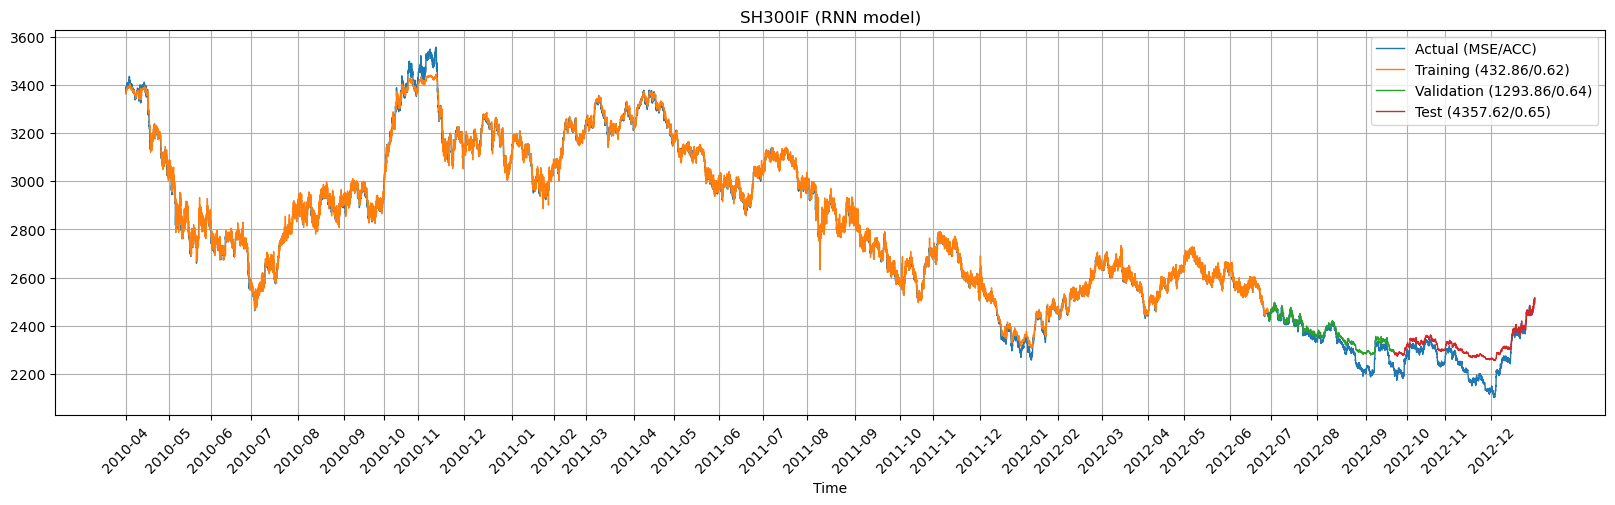

In [24]:
# Plot the results on training, validation and test data sets for Simple RNN model
labels = ['Actual', 'Training', 'Validation', 'Test']
RNN_predictions.plot_predictions(title="SH300IF (RNN model)", labels=labels)

In [ ]:
# Create a ModelPredictions object containing results from the GRU model 
GRU_predictions = ModelPredictions(GRU_model, 
                                   X = GRUdata.X, 
                                   y = GRUdata.y, 
                                   raw_y = GRUdata.raw_seq, 
                                   datetime = GRUdata.datetime,
                                   window = GRU_params['window'],
                                   batch_size = GRU_params['batch_size'])

In [ ]:
# Plot the results on training, validation and test data sets for RNN-GRU model
labels = ['Actual', 'Training', 'Validation', 'Test']
GRU_predictions.plot_predictions(title="SH300IF (GRU model)", labels=labels) 

In [ ]:
# Create a ModelPredictions object containing results from the LSTM model 
LSTM_predictions = ModelPredictions(LSTM_model, 
                                    X = LSTMdata.X, 
                                    y = LSTMdata.y, 
                                    raw_y = LSTMdata.raw_seq, 
                                    datetime = LSTMdata.datetime,
                                    window = LSTM_params['window'],
                                    batch_size = LSTM_params['batch_size'])

In [ ]:
# Plot the results on training, validation and test data sets for RNN-LSTM model
labels = ['Actual', 'Training', 'Validation', 'Test']
LSTM_predictions.plot_predictions(title="SH300IF (LSTM model)", labels=labels)

In [25]:
# Plot and compare the results obtained from the three RNNs on the test data set
testset = [RNN_predictions.true_org[2], 
           RNN_predictions.predictions_org[2],
           GRU_predictions.predictions_org[2],
           LSTM_predictions.predictions_org[2]]
datetime = pd.Series(RNNdata.datetime[2].values, 
                     index = RNN_predictions.true_org[2].index)
labels = ['Actual', 'RNN', 'GRU', 'LSTM']
list_mse = [RNN_predictions.loss[2],
       GRU_predictions.loss[2],
       LSTM_predictions.loss[2]]
list_mda = [RNN_predictions.mda[2],
       GRU_predictions.mda[2],
       LSTM_predictions.mda[2]]
labels_loss = create_labels(labels, list_mse, list_mda)
plot_seqs(testset, datetime=datetime, labels=labels_loss)

NameError: name 'GRU_predictions' is not defined

In [26]:
# Load previously saved models, including architecture, weights and optimizer states
dependencies = {'rmse': rmse,
                'mda': mda}
saved_RNN = load_model(RNN_filepath, custom_objects=dependencies)

In [27]:
# Create a StockIndexDataset object that contains new data for testing the SimpleRNN network
# Create the object with the key "test_only=True"

test_data = StockIndexDataset(datasets_path[-1], time_steps=RNN_params['time_steps'], 
                              forecast_steps=RNN_params['forecast_steps'],
                              batch_size=RNN_params['batch_size'], test_only=True)
test_data.info()

ParserError: Unknown string format: 135058,2024/02/17 15:41:30.400,POS,100714017,8.2415739,124.2438638,38.4,0.2991077,0.1491077 present at position 1

In [ ]:
# Create a ModelPredictions object containing results of the Simple RNN model on the test data set 
RNN_test = ModelPredictions(saved_RNN, 
                            X = test_data.X, 
                            y = test_data.y, 
                            raw_y = test_data.raw_seq, 
                            datetime = test_data.datetime,
                            window = RNN_params['window'],
                            batch_size = RNN_params['batch_size'])

In [ ]:
# Plot the testing results
labels = ['Actual', 'Test']
RNN_test.plot_predictions(title="SH300IF (RNN model)", labels=labels)